In [1]:
#modul de carrega i de neteja de les dades, comú des de la primera pràctica

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#per realitzar les grafiques de regrassió ha estat necessari ampliar els chunks k

plt.rcParams["agg.path.chunksize"]=10000

# load dataset
#names = ['AirTime', 'Distance']
dataframe = pd.read_csv("DelayedFlights.csv")
#, names=names)
dataframe.dropna(inplace = True)
msk = np.random.rand(len(dataframe)) < 0.001

df = dataframe[msk]


#en la pràctica inicial es demanar carregar sols uns columnes en concret per poder analitzar, en base comentaris
#carrego totes les columnes
#df=DelayFligths_df[["Data","DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay","DepTime","ArrTime","CancellationCode"]]

#millorat el procés de neteja / analisi de la qualitat en les dades
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())

df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())

df["AirTime"] = df['AirTime'].fillna(df['AirTime'].mean())
df["Distance"] = df['Distance'].fillna(df['Distance'].mean())


missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


df.dropna(inplace = True)

#esborren totes les files que segueixin contenint algun null, tot i la perdua dinformació
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


# transformar dades categoriques

factorizables_mapping = {}
factorizable_names = ['UniqueCarrier', 'Origin', 'Dest']
for fact_name in factorizable_names:
    df[fact_name], factorizables_mapping[fact_name] = pd.factorize(df[fact_name])
#Estudi Correlació de variables
corrMatrix = df.corr()
print (corrMatrix)


                   Unnamed: 0  Year     Month  DayofMonth  DayOfWeek  \
Unnamed: 0           1.000000   NaN  0.996297    0.062186   0.021821   
Year                      NaN   NaN       NaN         NaN        NaN   
Month                0.996297   NaN  1.000000    0.064599   0.020511   
DayofMonth           0.062186   NaN  0.064599    1.000000   0.008686   
DayOfWeek            0.021821   NaN  0.020511    0.008686   1.000000   
DepTime              0.003673   NaN  0.005908   -0.037592   0.042221   
CRSDepTime          -0.010382   NaN -0.008489   -0.013917   0.049747   
ArrTime              0.015657   NaN  0.017716    0.006319   0.017394   
CRSArrTime           0.007345   NaN  0.005935   -0.025401   0.009514   
UniqueCarrier        0.127469   NaN  0.057934    0.027958   0.001277   
FlightNum            0.052144   NaN  0.071541    0.019057  -0.026316   
ActualElapsedTime    0.004326   NaN -0.019319   -0.017796  -0.031811   
CRSElapsedTime       0.006861   NaN -0.015303   -0.023960  -0.02

<ipython-input-1-a0590889b267>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())
<ipython-input-1-a0590889b267>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())
<ipython-input-1-a0590889b267>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [2]:
#Estudiem el calcul MSE i al R2
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math
#regressió lineal, es calcula la relació entre la variable Arrdelay depenent del  temps de vol 
#df2_x = pd.DataFrame(np.c_[df['AirTime']], columns = ['AirTime'])

df2_x = pd.DataFrame(df.AirTime)

df2_y = pd.DataFrame(df.Distance)

x_train, x_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.33, random_state=42)



C:\Users\mcarm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mcarm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mcarm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\mcarm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

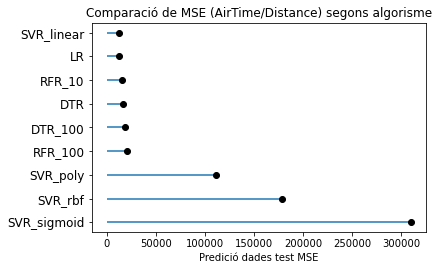

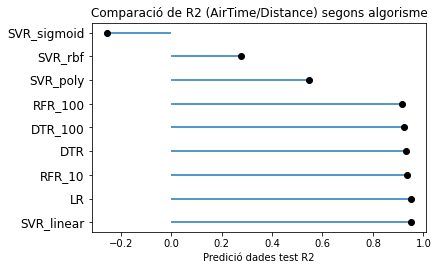

In [3]:
# EXERCICI 3. Entrena’ls utilitzant els diferents paràmetres que admeten.
# amb dades molt correlacionades AirTime i Distance
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# preparem els models a analitzar, per cada un guardem el MSE i el R2
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR_rbf', SVR(kernel = 'rbf')))
models.append(('SVR_linear', SVR(kernel = 'linear')))
models.append(('SVR_poly', SVR(kernel = 'poly')))
models.append(('SVR_sigmoid', SVR(kernel = 'sigmoid')))

models.append(('DTR', DecisionTreeRegressor(random_state=0)))
models.append(('DTR_100', DecisionTreeRegressor(random_state = 100,  max_depth = 3, min_samples_leaf = 5)))
models.append(('RFR_10', RandomForestRegressor(n_estimators = 10)))
models.append(('RFR_100', RandomForestRegressor(n_estimators = 100,max_depth=2, random_state=0)))

results1 = []
results2 = []
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
          
    model.fit(x_train, y_train)

    #predicció amb les dades de test
    y_test_pred = model.predict(x_test)

    results1.append(mean_squared_error(y_test, y_test_pred))
    results2.append(r2_score(y_test, y_test_pred))
    results.append(model.score)
    names.append(name)
    
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

# boxplot algorithm comparison
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
#plt.show()


resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results1
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de MSE (AirTime/Distance) segons algorisme'),
ax.set_xlabel('Predició dades test MSE');



resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results2
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de R2 (AirTime/Distance) segons algorisme'),
ax.set_xlabel('Predició dades test R2');




In [4]:
#al ser dades correlacionades, algorisme amb més exit és LR i menys SVR que dona uns valors totalment desproporcionat
#un 95% de R2 (pel LR i SVR_lineal iguals ) és un bon model

#R2 negatiu indica que el model és dolent